# Chapter 7: Functions -- advanced topics

## 7.1 Scope
* variable defined *inside* a function are only visible *inside* the function (we call these *local* variables)
* variables defined *outside* a function are visible but cannot be changed (they are *global* variables)
* if a local variable has the same name as a global variable, it replaces the global variable

In [1]:
x = 1
def example1(y):
    z = 23
    # in example1, x is global, y and z are local
    print(f"inside example1: x = {x}, y = {y}, z = {z}")

example1(2)


inside example1: x = 1, y = 2, z = 23


In [3]:
# since y and z are local to example1, they are "out of scope" here
print(f"outside example1: x = {x}, z = {z}")

NameError: name 'z' is not defined

In [4]:
x = 1
def example2(y):
    z = 23
    x = y
    # This is a bit subtle: we have created a "new" local variable x which is equal to 3
    # changing x here does not affect the value of the 'global' x
    print(f"inside example2: x = {x}")
print(f"before example2: x = {x}")
example2(3)
print(f"after example2:  x = {x}")


before example2: x = 1
inside example2: x = 3
after example2:  x = 1


In [14]:
x = 1
def example3(y):
    z = x + 1
    x = 3
    # or x = x + 1
    # This is incorrect: the left hand side suggests that x is a new local variable, but the right hand side 
    # suggests that we want to access the 'global' x
    print(f"inside example3: x = {x}")
    print(f"inside example3: z = {z}")
print(f"before example3: x = {x}")
example3(3)
print(f"after example3:  x = {x}")

before example3: x = 1


UnboundLocalError: cannot access local variable 'x' where it is not associated with a value

### Short version:
* Avoid global variables as much as possible
* Even though it is technically possible, **do not access global variables** inside a function. 
* Pass all needed variables as parameters.

In [16]:
t = 1
# This version does not access x directly. Instead, we are passing x as a parameter
def example4(y, x):
    z = x
    # in example1, x is global, y and z are local
    print(f"inside example1: x = {x}, y = {y}, z = {z}")

example4(2, t)


inside example1: x = 1, y = 2, z = 1


## 7.2 Side effects

> "A function is said to have a *side effects* if it has any observable effect other than its primary effect of reading the value of its arguments and returning a value to the invoker of the operation."

* We have seen that a python function cannot change variables outside its scope (see `example2` above).
* It also cannot change the value of its arguments. (this makes sense, since we can pass *constants* as arguments).

Summary, anything that you want modified in a function needs to be `return`ed

In [21]:
x = 1
y = 2
def example5(x, z):
    x = z
    print(f"inside example5: x = {x}, y = {y}")
    return x

print(f"before example5: x = {x}, y = {y}")
x = example5(x,y)
print(f"after example5:  x = {x}, y = {y}")

print(f"before example5: x = {x}, y = {y}")
x = example5(x,y)
print(f"after example5:  x = {x}, y = {y}")



before example5: x = 1, y = 2
inside example5: x = 2, y = 2
after example5:  x = 2, y = 2
before example5: x = 2, y = 2
inside example5: x = 2, y = 2
after example5:  x = 2, y = 2


## 7.3 Warning: things get more complicated with containers...

In [24]:
X = [1,2,3]
Y = [4,5,6]
def example6(Z):
    X[1] = Z[1]
    #X = [9, 10, 11, 12]
    print(f"inside example6: X = {X}, Z = {Z}")

print(f"after example6:  X = {X}, Y = {Y}")

before example6: X = [1, 2, 3], Y = [4, 5, 6]
inside example6: X = [1, 5, 3], Z = [4, 5, 6]
after example6:  X = [1, 5, 3], Y = [4, 5, 6]


How come X was changed inside `example6`???

In [28]:
X = [1,2,3]
Z = X
print(f"X = {X}, Z = {Z}") 
X[1] = 6
print(f"X = {X}, Z = {Z}") 

X = [9, 10, 11]
print(f"X = {X}, Z = {Z}") 



X = [1, 2, 3], Z = [1, 2, 3]
X = [1, 6, 3], Z = [1, 6, 3]
X = [9, 10, 11], Z = [1, 6, 3]


In [29]:
X = [1,2,3]
Y = [4,5,6]
def example7(Z):
    X = Z
    print(f"inside example7: X = {X}, Z = {Z}")
print(f"before example7: X = {X}, Y = {Y}")
example7(Y)
print(f"after example7:  X = {X}, Y = {Y}")


before example7: X = [1, 2, 3], Y = [4, 5, 6]
inside example7: X = [4, 5, 6], Z = [4, 5, 6]
after example7:  X = [1, 2, 3], Y = [4, 5, 6]


How come X was changed inside `example6` but not inside `example7`???

## 7.4 lambda-functions
Lambdas are compact ways to define functions without necessarily giving them names. 

Syntax:
```
lambda arguments : returned expression
```


In [32]:
def evaluateat(x, f):
    print(f"f({x}) = {f(x)}")

def g(x):
    return x**2

evaluateat(4, g)
evaluateat(5, g)


f(4) = 16
f(5) = 25


say we just want to call `evaluateat` for $f(x) = x^2$ but will never really reuse $f$, so don't want to define this function. We can use a lambda here:

In [51]:
evaluateat(lambda x : x**2, 10)

f(10) = 100


A classical use of lambdas is to fix some parameters of a function.
The function $f(x) = |x|$ is not differentiable at 0. It is common to approximate by
$$
    f_\varepsilon(x) \ \sqrt{x^2+ \varepsilon},
$$
where $0 <\varepsilon$ is a small regularization parameter.

Let's compare the values of $f$ and $f_\varepsilon$.

In [34]:
import math
def smoothabs(a,epsilon):
    return math.sqrt(a**2+epsilon)
    

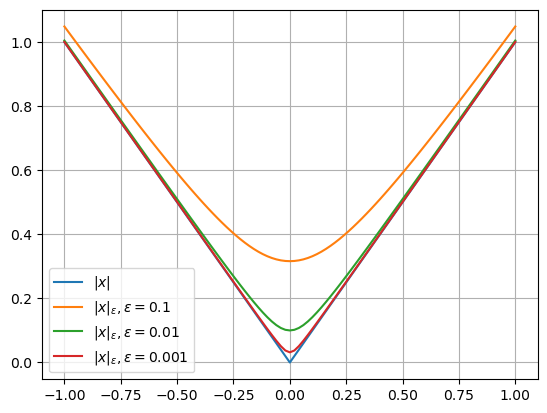

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
X = np.linspace(-1,1,101)

f = plt.figure()
plt.plot(X,[abs(x) for x in X], label = f'$|x|$')
for epsilon in [0.1, 0.01, 0.001]:
    plt.plot(X,[smoothabs(x,epsilon) for x in X], label = f'$|x|_\\varepsilon, \\varepsilon = {{{epsilon}}}$')
plt.legend(loc=0)
plt.grid()
plt.show()


In [41]:
def tabulate (x, f):
    print("x:    ", end="")
    for xx in x:
        print(f"{xx:.3f}", end = "\t")
    print()
    print("f(x): ", end="")
    for xx in x:
        print(f"{f(xx):.3f}", end = "\t")
    print()

def g(y):
    return y**2

tabulate([0.9, 0.99, 0.999, 0.999], g)

X = [-0.1, -0.01, -0.001, 0, 0.001, 0.01, 0.1]
epsilon = 0.01
tabulate(X, lambda x : smoothabs(x, epsilon))
tabulate(X, lambda x : abs(x))


x:    0.900	0.990	0.999	0.999	
f(x): 0.810	0.980	0.998	0.998	
x:    -0.100	-0.010	-0.001	0.000	0.001	0.010	0.100	
f(x): 0.141	0.100	0.100	0.100	0.100	0.100	0.141	
x:    -0.100	-0.010	-0.001	0.000	0.001	0.010	0.100	
f(x): 0.100	0.010	0.001	0.000	0.001	0.010	0.100	


In [117]:
X = [-1, -0.5, 0, 0.5, 1]
tabulate(X, lambda x: abs(x))
tabulate(X, lambda x : smoothabs(x, 0.001))

x:    -1.000	-0.500	0.000	0.500	1.000	
f(x): 1.000	0.500	0.000	0.500	1.000	
x:    -1.000	-0.500	0.000	0.500	1.000	
f(x): 1.000	0.501	0.032	0.501	1.000	


In [42]:
def derivate(f,a,h):
    return (f(a+h) - f(a)) / h

def g(x):
    return x**2

h = 0.001
tabulate(X,g)
tabulate(X, lambda x : derivate(g,x,h))


x:    -0.100	-0.010	-0.001	0.000	0.001	0.010	0.100	
f(x): 0.010	0.000	0.000	0.000	0.000	0.000	0.010	
x:    -0.100	-0.010	-0.001	0.000	0.001	0.010	0.100	
f(x): -0.199	-0.019	-0.001	0.001	0.003	0.021	0.201	
